# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [1]:
!pip install -U matplotlib==2.0.2
#As suggested in the forums to account for a matplotlib error

    100% |████████████████████████████████| 14.6MB 48kB/s  eta 0:00:01   67% |█████████████████████▊          | 9.9MB 35.9MB/s eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib==2.0.2)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
    100% |████████████████████████████████| 215kB 3.3MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 58kB/s  eta 0:00:01
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-20

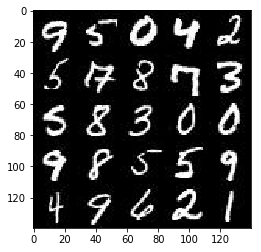

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

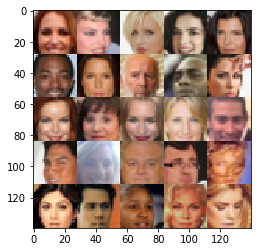

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    Real_input=tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='Real_input') 
    Z_input=tf.placeholder(tf.float32, (None, z_dim), name='Z_input')
    Learn_Rate=tf.placeholder(tf.float32, name='Learn_Rate')
    
    return (Real_input, Z_input, Learn_Rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    #used code suggested in these disscussions to set the inititializers and droppout
    
    #https://stackoverflow.com/questions/43284047/what-is-the-default-kernel-initializer-in-tf-layers-conv2d-and-tf-layers-dense
    #https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/
    #https://www.tensorflow.org/api_docs/python/tf/layers/dense
    #https://www.tensorflow.org/api_docs/python/tf/layers/conv2d
    #https://www.tensorflow.org/api_docs/python/tf/layers/dropout
    #https://www.tutorialspoint.com/python/number_sqrt.htm
    
    #import math
    
    with tf.variable_scope('discriminator', reuse=reuse):
        #28x28x (1 or 3)
        
        #print (images.shape[1])
        x1_kernalsize=128
        x1=tf.layers.conv2d(images, x1_kernalsize, 5, strides=2, padding='same',
                            kernel_initializer=tf.truncated_normal_initializer(
                                stddev=(2.0/(2+x1_kernalsize)), dtype=tf.float32)) #2 is used as the average or 1 and 3 (the two cases to be tested)
                            
        x1_leakyRELU=tf.maximum(x1*0.2, x1)
        x1_drop=tf.layers.dropout(x1_leakyRELU, rate=0.3)
    
        #14x14x64
        x2_kernalsize=256
        x2_logit=tf.layers.conv2d(x1_drop, x2_kernalsize, 5, strides=2, padding='same',
                            kernel_initializer=tf.truncated_normal_initializer(
                                stddev=(2.0/(x1_kernalsize+x2_kernalsize)), dtype=tf.float32))

        x2_norm=tf.layers.batch_normalization(x2_logit, training=True)
        x2_leakyRELU=tf.maximum(x2_norm*.2, x2_norm)
        x2_drop=tf.layers.dropout(x2_leakyRELU, rate=0.3)
    
    
        #14x14x128
        x3_kernalsize=512
        x3_logit=tf.layers.conv2d(x2_drop, x3_kernalsize, 5, strides=1, padding='same',
                            kernel_initializer=tf.truncated_normal_initializer(
                                stddev=(2.0/(x2_kernalsize+x3_kernalsize)), dtype=tf.float32))
        x3_norm=tf.layers.batch_normalization(x3_logit, training=True)
        x3_leakyRELU=tf.maximum(x3_norm*.2, x3_norm)
        x3_drop=tf.layers.dropout(x3_leakyRELU, rate=0.3)
        
        #7x7x256
        #x4_logit=tf.layers.conv2d(x3, 1048, 5, strides=1, padding='same')
        #x4_norm=tf.layers.batch_normalization(x4_logit, training=True)
        #x4=tf.maximum(x4_norm*.2, x4_norm)
        
        #print(x3.shape)
        #4x4x128
        #x4_logit=tf.layers.conv2d(x3, 256, 5, strides=2, padding='same')
        #x4_norm=tf.layers.batch_normalization(x4_logit, training=True)
        #x4=tf.nn.relu(x4_norm)
        
        
        #7x7*512
        flat=tf.reshape(x3_drop, (-1, (7*7*x3_kernalsize)))
        Logits=tf.layers.dense(flat,1,
                            kernel_initializer=tf.truncated_normal_initializer(
                                stddev=(2.0/(1+x3_kernalsize)), dtype=tf.float32))
        Output=tf.sigmoid(Logits)
    
        
    return (Output, Logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
#used code suggested in these disscussions to set the inititializers and droppout
    
    #https://stackoverflow.com/questions/43284047/what-is-the-default-kernel-initializer-in-tf-layers-conv2d-and-tf-layers-dense
    #https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/
    #https://www.tensorflow.org/api_docs/python/tf/layers/dense
    #https://www.tensorflow.org/api_docs/python/tf/layers/conv2d
    #https://www.tensorflow.org/api_docs/python/tf/layers/dropout
    #https://www.tutorialspoint.com/python/number_sqrt.htm
    
    #import math

    
    with tf.variable_scope('generator', reuse=not is_train):
        
        x1_kernalsize=512
        x1=tf.layers.dense(z, 7*7*x1_kernalsize, kernel_initializer=tf.truncated_normal_initializer(
                                stddev=(2.0/(x1_kernalsize)), dtype=tf.float32))
    
        x1=tf.reshape(x1, (-1, 7, 7, x1_kernalsize))
        x1_norm=tf.layers.batch_normalization(x1, training=is_train)
        x1_leakyRELU=tf.maximum(x1_norm*0.2, x1_norm)
        x1_drop=tf.layers.dropout(x1_leakyRELU, rate=0.3)
        
        #7x7x64
        x2_kernalsize=256
        x2_logits=tf.layers.conv2d_transpose(x1_drop, x2_kernalsize, 5, strides=2, padding='same',
                                      kernel_initializer=tf.truncated_normal_initializer(
                                          stddev=(2.0/(x1_kernalsize+x2_kernalsize)), dtype=tf.float32))
        x2_norm=tf.layers.batch_normalization(x2_logits, training=is_train)
        x2_leakyRELU=tf.maximum(x2_norm*.2, x2_norm)
        x2_drop=tf.layers.dropout(x2_leakyRELU, rate=0.3)
        
        #7x7x64
        x3_kernalsize=128
        x3_logits=tf.layers.conv2d_transpose(x2_drop, x3_kernalsize, 5, strides=1, padding='same',
                                      kernel_initializer=tf.truncated_normal_initializer(
                                          stddev=(2.0/(x2_kernalsize+x3_kernalsize)), dtype=tf.float32))
        x3_norm=tf.layers.batch_normalization(x3_logits, training=is_train)
        x3_leakyRELU=tf.maximum(x3_norm*.2, x3_norm)
        x3_drop=tf.layers.dropout(x3_leakyRELU, rate=0.3)
        
        #14x14x32
        x4_kernalsize=out_channel_dim
        Logits=tf.layers.conv2d_transpose(x3_drop, x4_kernalsize, 5, strides=2, padding='same',
                                      kernel_initializer=tf.truncated_normal_initializer(
                                          stddev=(2.0/(x3_kernalsize+x4_kernalsize)), dtype=tf.float32))
        Output=tf.tanh(Logits)
        #28x28x(1 or 3)        
        
    return (Output)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model=generator(input_z, out_channel_dim)
    dis_model_real, dis_model_real_logits=discriminator(input_real)
    dis_model_fake, dis_model_fake_logits=discriminator(gen_model, reuse=True)
    
    d_loss_real=tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(
                                logits=dis_model_real_logits, labels=tf.ones_like(dis_model_real)*0.9))
    
    d_loss_fake=tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(
                                logits=dis_model_fake_logits, labels=tf.zeros_like(dis_model_fake)))
    
    g_loss=tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(
                                logits=dis_model_fake_logits, labels=tf.ones_like(dis_model_fake)))
    
    d_loss=d_loss_real+d_loss_fake
    
    
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # TODO: Implement Function
    All_vars=tf.trainable_variables()
    dis_vars=[i for i in All_vars if i.name.startswith('discriminator')]
    gen_vars=[i for i in All_vars if i.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        dis_trian=tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train=tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    
    return (dis_trian, gen_train)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print(data_shape, data_shape[2])
    
    print(data_image_mode)
    # TODO: Build Model
    #tf.reset_default_graph()
    #if data_image_mode=='L':
    #    image_channels=1
    #    out_channel_dim=1
    #else:
    #    image_channels=3
    #    out_channel_dim=3
        
        
    Real_input, Z_input, Learn_Rate=model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss=model_loss(Real_input, Z_input, data_shape[3])
    
    dis_trian, gen_train=model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            count=0
            print(count)
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                batch_z=np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images=batch_images*2
                
                #print(batch_images.shape)
                
                _=sess.run(dis_trian, feed_dict={Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
                _=sess.run(gen_train, feed_dict={Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
                
                count+=1
                #print(count, 'of ', data_shape[0]/batch_size)
                if count%100==0:
                    print(count, 'of ', data_shape[0]/batch_size)
                    show_generator_output(sess, 10, Z_input, data_shape[3], data_image_mode)
                    train_loss_d = sess.run(d_loss, {Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
                    #train_loss_d = d_loss.eval({Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
                    train_loss_g = g_loss.eval({Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g)) 
        
        show_generator_output(sess, 10, Z_input, data_shape[3], data_image_mode)
        train_loss_d = sess.run(d_loss, {Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
        train_loss_g = g_loss.eval({Real_input:batch_images, Z_input:batch_z, Learn_Rate:learning_rate})
        print("Final",
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g)) 


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1) 28
L
0
100 of  1875.0


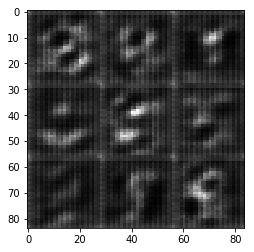

Epoch 1/2... Discriminator Loss: 1.8897... Generator Loss: 0.5935
200 of  1875.0


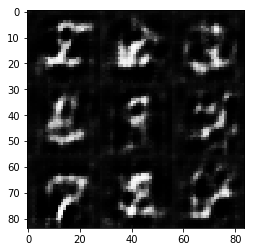

Epoch 1/2... Discriminator Loss: 2.0547... Generator Loss: 0.2208
300 of  1875.0


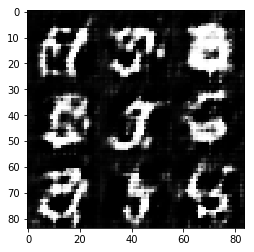

Epoch 1/2... Discriminator Loss: 1.5214... Generator Loss: 0.5292
400 of  1875.0


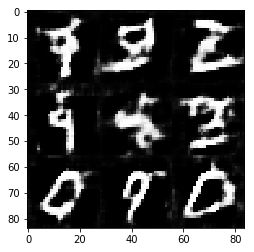

Epoch 1/2... Discriminator Loss: 1.7177... Generator Loss: 1.1892
500 of  1875.0


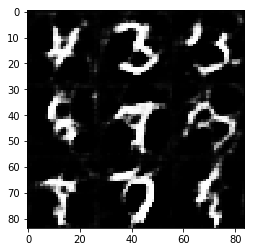

Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 1.3992
600 of  1875.0


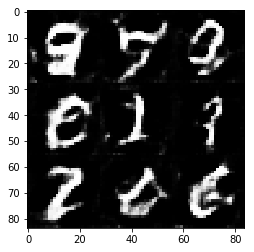

Epoch 1/2... Discriminator Loss: 2.0113... Generator Loss: 0.3141
700 of  1875.0


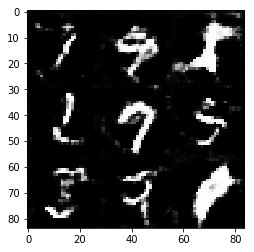

Epoch 1/2... Discriminator Loss: 1.4355... Generator Loss: 0.8621
800 of  1875.0


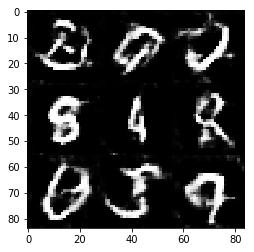

Epoch 1/2... Discriminator Loss: 1.1900... Generator Loss: 0.9738
900 of  1875.0


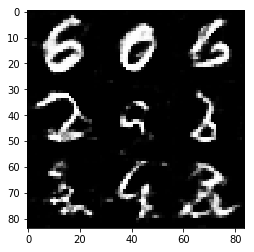

Epoch 1/2... Discriminator Loss: 2.1752... Generator Loss: 0.2476
1000 of  1875.0


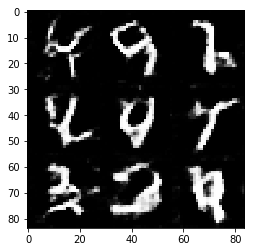

Epoch 1/2... Discriminator Loss: 1.6104... Generator Loss: 0.3980
1100 of  1875.0


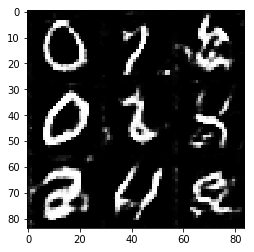

Epoch 1/2... Discriminator Loss: 2.2613... Generator Loss: 0.2276
1200 of  1875.0


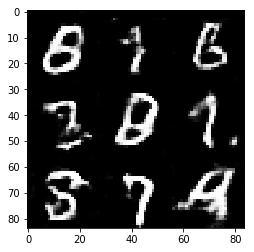

Epoch 1/2... Discriminator Loss: 1.0776... Generator Loss: 0.9468
1300 of  1875.0


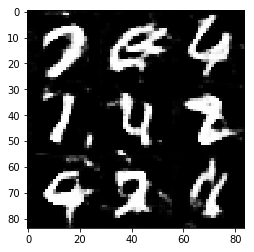

Epoch 1/2... Discriminator Loss: 1.2179... Generator Loss: 2.0126
1400 of  1875.0


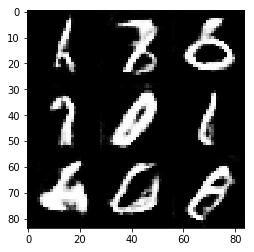

Epoch 1/2... Discriminator Loss: 1.8308... Generator Loss: 0.3443
1500 of  1875.0


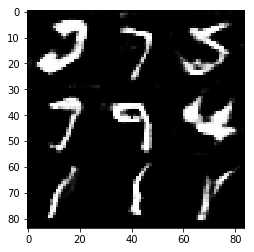

Epoch 1/2... Discriminator Loss: 1.1628... Generator Loss: 0.9604
1600 of  1875.0


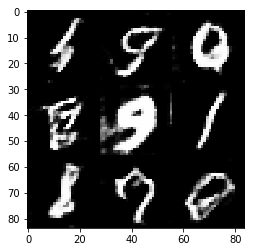

Epoch 1/2... Discriminator Loss: 1.5826... Generator Loss: 0.4225
1700 of  1875.0


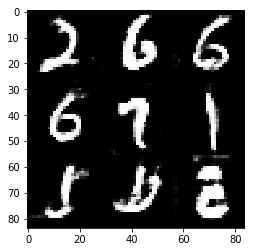

Epoch 1/2... Discriminator Loss: 1.2731... Generator Loss: 0.7167
1800 of  1875.0


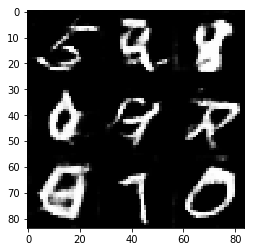

Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 2.3114
0
100 of  1875.0


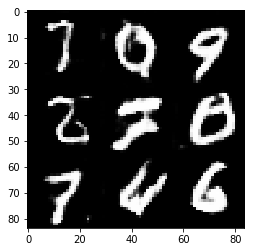

Epoch 2/2... Discriminator Loss: 0.7626... Generator Loss: 1.7301
200 of  1875.0


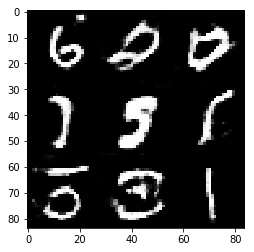

Epoch 2/2... Discriminator Loss: 0.8099... Generator Loss: 1.7173
300 of  1875.0


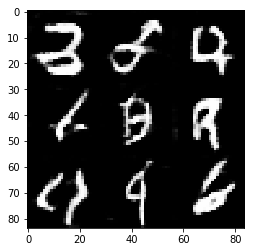

Epoch 2/2... Discriminator Loss: 1.0538... Generator Loss: 0.8774
400 of  1875.0


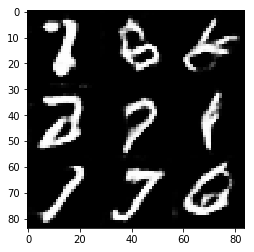

Epoch 2/2... Discriminator Loss: 0.6972... Generator Loss: 1.6118
500 of  1875.0


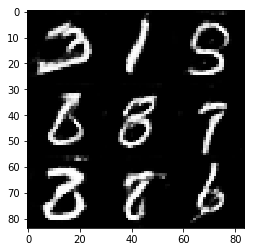

Epoch 2/2... Discriminator Loss: 0.8661... Generator Loss: 1.6478
600 of  1875.0


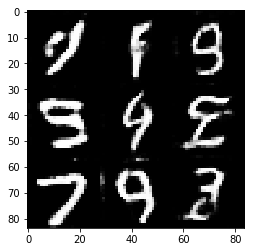

Epoch 2/2... Discriminator Loss: 1.0831... Generator Loss: 1.6123
700 of  1875.0


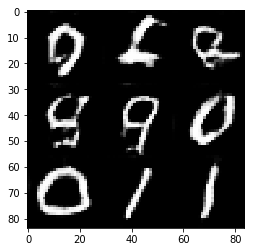

Epoch 2/2... Discriminator Loss: 0.9186... Generator Loss: 2.0073
800 of  1875.0


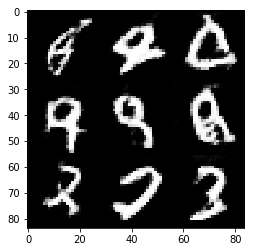

Epoch 2/2... Discriminator Loss: 0.7463... Generator Loss: 1.3968
900 of  1875.0


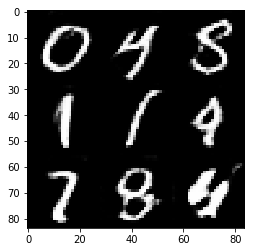

Epoch 2/2... Discriminator Loss: 0.9123... Generator Loss: 1.1367
1000 of  1875.0


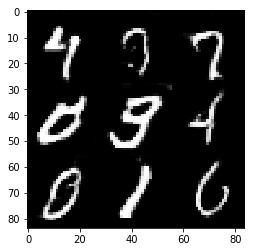

Epoch 2/2... Discriminator Loss: 1.2670... Generator Loss: 2.4087
1100 of  1875.0


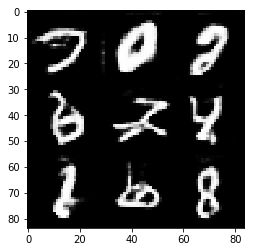

Epoch 2/2... Discriminator Loss: 1.1410... Generator Loss: 1.0703
1200 of  1875.0


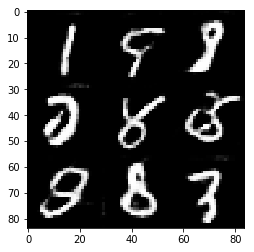

Epoch 2/2... Discriminator Loss: 0.7355... Generator Loss: 1.5084
1300 of  1875.0


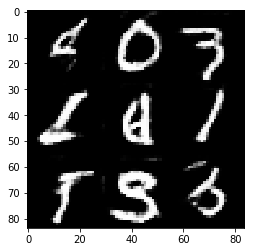

Epoch 2/2... Discriminator Loss: 1.1815... Generator Loss: 0.8734
1400 of  1875.0


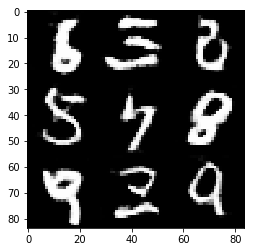

Epoch 2/2... Discriminator Loss: 1.3401... Generator Loss: 0.6369
1500 of  1875.0


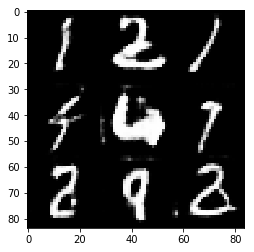

Epoch 2/2... Discriminator Loss: 0.8553... Generator Loss: 2.4110
1600 of  1875.0


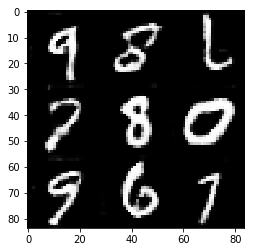

Epoch 2/2... Discriminator Loss: 0.9386... Generator Loss: 1.2957
1700 of  1875.0


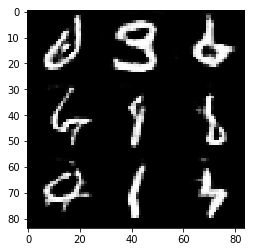

Epoch 2/2... Discriminator Loss: 2.4404... Generator Loss: 0.3210
1800 of  1875.0


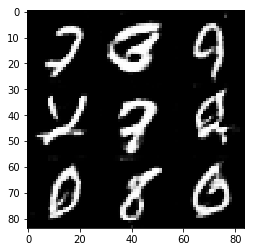

Epoch 2/2... Discriminator Loss: 0.8983... Generator Loss: 1.3500


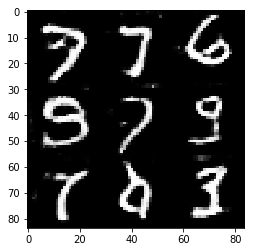

Final Discriminator Loss: 2.0035... Generator Loss: 0.4483


In [13]:
batch_size = 32
z_dim = 728
learning_rate = .0005
beta1 = .3

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3) 28
RGB
0
100 of  12662.4375


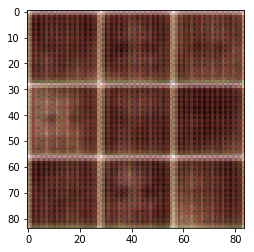

Epoch 1/1... Discriminator Loss: 2.2060... Generator Loss: 0.2160
200 of  12662.4375


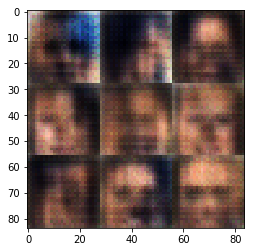

Epoch 1/1... Discriminator Loss: 3.6328... Generator Loss: 0.0491
300 of  12662.4375


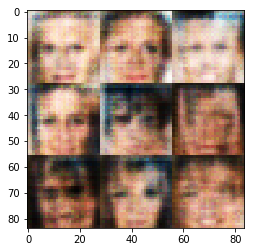

Epoch 1/1... Discriminator Loss: 2.3115... Generator Loss: 0.2036
400 of  12662.4375


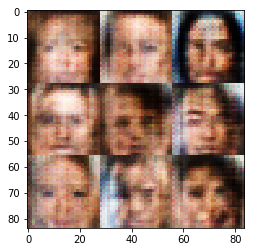

Epoch 1/1... Discriminator Loss: 2.0857... Generator Loss: 0.3051
500 of  12662.4375


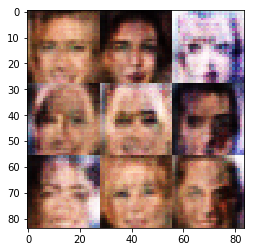

Epoch 1/1... Discriminator Loss: 2.1368... Generator Loss: 0.2065
600 of  12662.4375


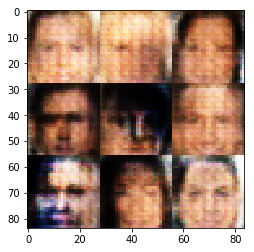

Epoch 1/1... Discriminator Loss: 2.4653... Generator Loss: 0.1434
700 of  12662.4375


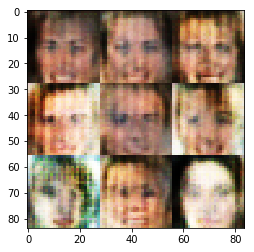

Epoch 1/1... Discriminator Loss: 2.6539... Generator Loss: 0.1179
800 of  12662.4375


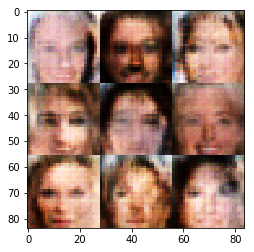

Epoch 1/1... Discriminator Loss: 2.2265... Generator Loss: 0.1829
900 of  12662.4375


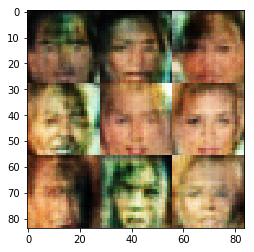

Epoch 1/1... Discriminator Loss: 1.5277... Generator Loss: 0.5167
1000 of  12662.4375


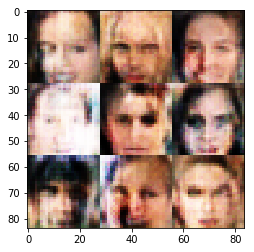

Epoch 1/1... Discriminator Loss: 1.6089... Generator Loss: 0.5385
1100 of  12662.4375


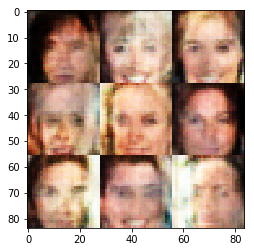

Epoch 1/1... Discriminator Loss: 1.6510... Generator Loss: 0.4875
1200 of  12662.4375


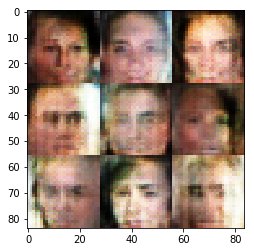

Epoch 1/1... Discriminator Loss: 2.2797... Generator Loss: 0.1734
1300 of  12662.4375


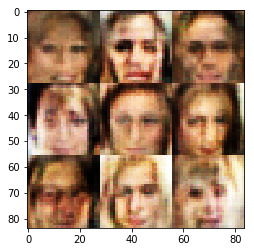

Epoch 1/1... Discriminator Loss: 1.7631... Generator Loss: 0.5823
1400 of  12662.4375


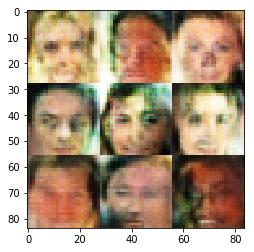

Epoch 1/1... Discriminator Loss: 1.5412... Generator Loss: 0.5764
1500 of  12662.4375


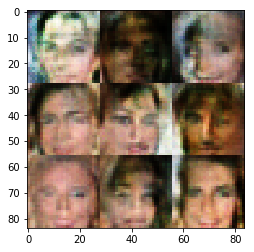

Epoch 1/1... Discriminator Loss: 1.6701... Generator Loss: 0.4178
1600 of  12662.4375


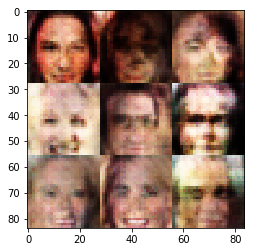

Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.5142
1700 of  12662.4375


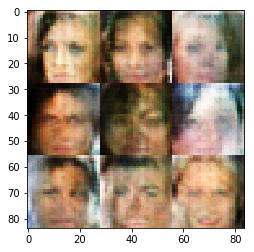

Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.6994
1800 of  12662.4375


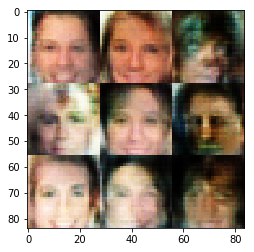

Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.5244
1900 of  12662.4375


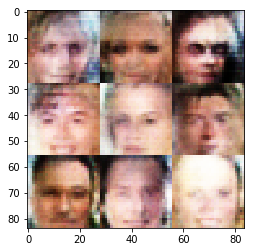

Epoch 1/1... Discriminator Loss: 2.1644... Generator Loss: 1.7485
2000 of  12662.4375


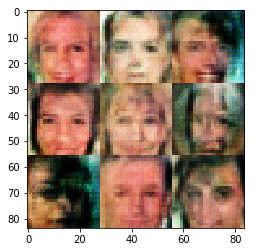

Epoch 1/1... Discriminator Loss: 1.6638... Generator Loss: 0.8202
2100 of  12662.4375


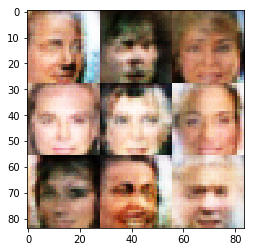

Epoch 1/1... Discriminator Loss: 2.0204... Generator Loss: 0.2144
2200 of  12662.4375


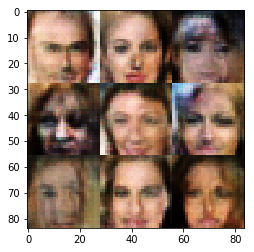

Epoch 1/1... Discriminator Loss: 1.6119... Generator Loss: 0.8429
2300 of  12662.4375


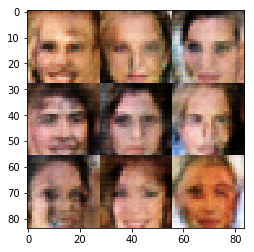

Epoch 1/1... Discriminator Loss: 1.7145... Generator Loss: 1.0206
2400 of  12662.4375


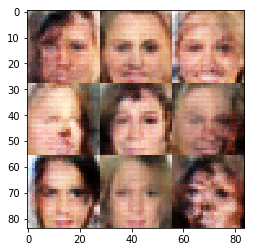

Epoch 1/1... Discriminator Loss: 1.8104... Generator Loss: 1.3818
2500 of  12662.4375


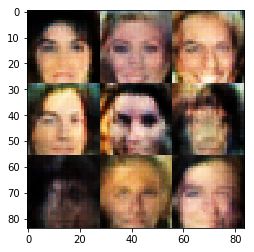

Epoch 1/1... Discriminator Loss: 1.8855... Generator Loss: 0.3373
2600 of  12662.4375


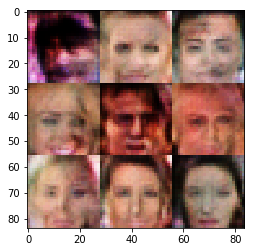

Epoch 1/1... Discriminator Loss: 1.7588... Generator Loss: 0.4732
2700 of  12662.4375


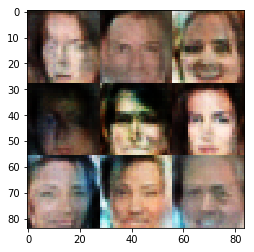

Epoch 1/1... Discriminator Loss: 1.6236... Generator Loss: 0.3667
2800 of  12662.4375


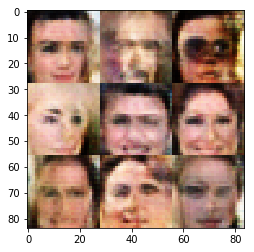

Epoch 1/1... Discriminator Loss: 1.5275... Generator Loss: 0.7887
2900 of  12662.4375


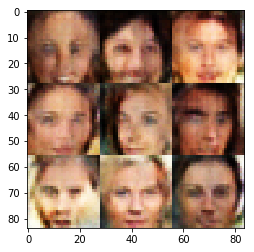

Epoch 1/1... Discriminator Loss: 2.3997... Generator Loss: 0.1507
3000 of  12662.4375


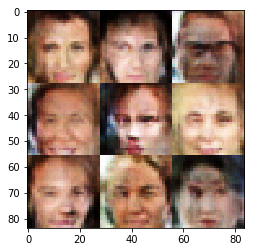

Epoch 1/1... Discriminator Loss: 1.6363... Generator Loss: 0.5323
3100 of  12662.4375


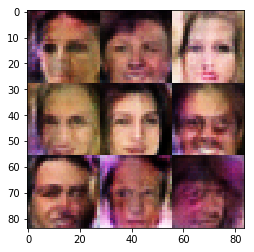

Epoch 1/1... Discriminator Loss: 1.6134... Generator Loss: 0.7124
3200 of  12662.4375


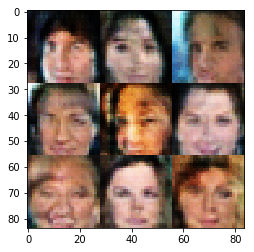

Epoch 1/1... Discriminator Loss: 1.5880... Generator Loss: 0.6753
3300 of  12662.4375


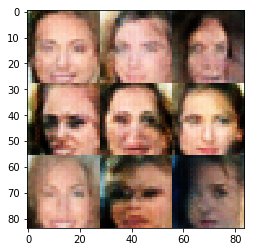

Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.9805
3400 of  12662.4375


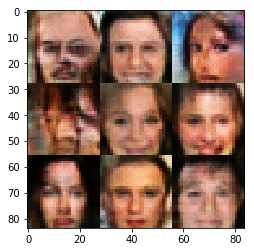

Epoch 1/1... Discriminator Loss: 1.8108... Generator Loss: 0.3858
3500 of  12662.4375


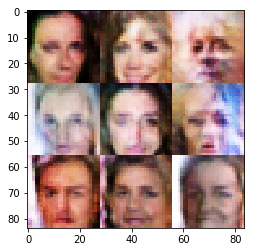

Epoch 1/1... Discriminator Loss: 2.1689... Generator Loss: 0.2041
3600 of  12662.4375


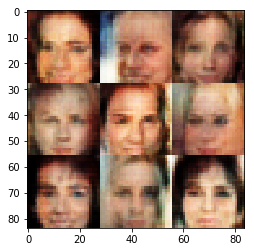

Epoch 1/1... Discriminator Loss: 1.5444... Generator Loss: 0.8606
3700 of  12662.4375


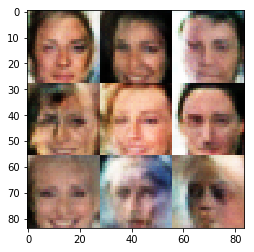

Epoch 1/1... Discriminator Loss: 1.7678... Generator Loss: 0.3329
3800 of  12662.4375


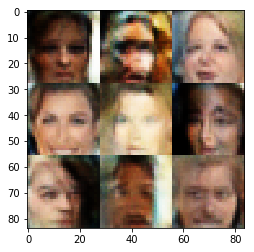

Epoch 1/1... Discriminator Loss: 2.1735... Generator Loss: 0.2055
3900 of  12662.4375


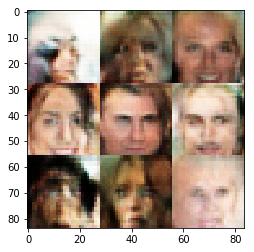

Epoch 1/1... Discriminator Loss: 1.7132... Generator Loss: 0.3567
4000 of  12662.4375


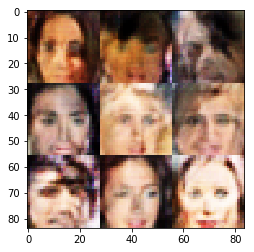

Epoch 1/1... Discriminator Loss: 1.7304... Generator Loss: 0.3240
4100 of  12662.4375


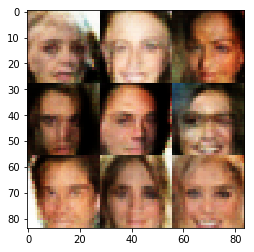

Epoch 1/1... Discriminator Loss: 1.8082... Generator Loss: 0.3497
4200 of  12662.4375


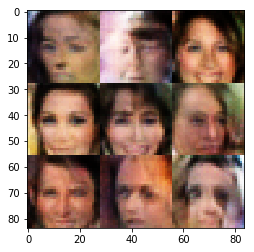

Epoch 1/1... Discriminator Loss: 1.8398... Generator Loss: 0.3087
4300 of  12662.4375


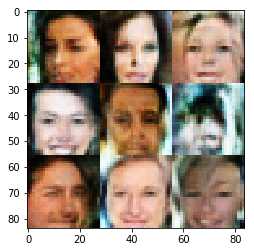

Epoch 1/1... Discriminator Loss: 1.8469... Generator Loss: 0.2876
4400 of  12662.4375


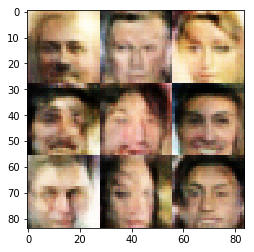

Epoch 1/1... Discriminator Loss: 2.0121... Generator Loss: 1.5441
4500 of  12662.4375


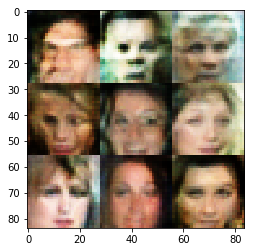

Epoch 1/1... Discriminator Loss: 2.0605... Generator Loss: 0.2259
4600 of  12662.4375


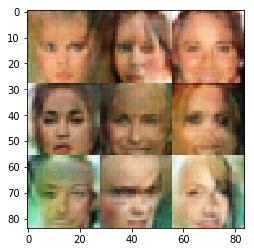

Epoch 1/1... Discriminator Loss: 1.5844... Generator Loss: 0.3995
4700 of  12662.4375


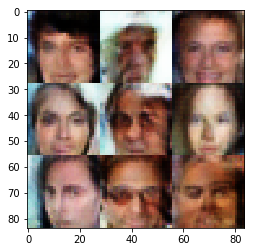

Epoch 1/1... Discriminator Loss: 1.9109... Generator Loss: 0.2965
4800 of  12662.4375


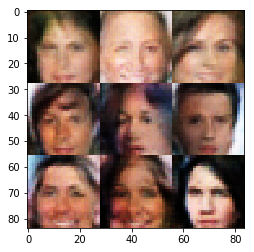

Epoch 1/1... Discriminator Loss: 1.7013... Generator Loss: 0.5020
4900 of  12662.4375


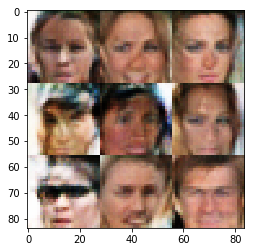

Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.8676
5000 of  12662.4375


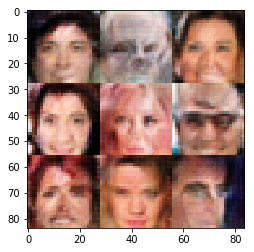

Epoch 1/1... Discriminator Loss: 2.0461... Generator Loss: 0.2272
5100 of  12662.4375


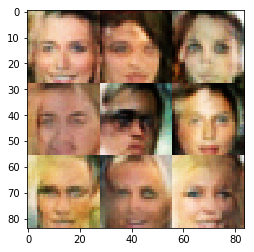

Epoch 1/1... Discriminator Loss: 1.7364... Generator Loss: 0.5330
5200 of  12662.4375


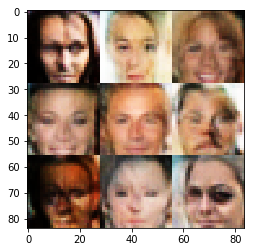

Epoch 1/1... Discriminator Loss: 1.6121... Generator Loss: 0.5194
5300 of  12662.4375


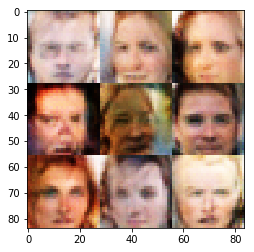

Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.5141
5400 of  12662.4375


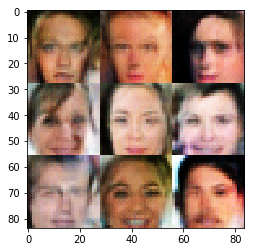

Epoch 1/1... Discriminator Loss: 1.2164... Generator Loss: 0.7607
5500 of  12662.4375


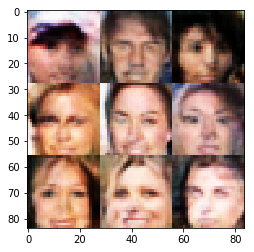

Epoch 1/1... Discriminator Loss: 2.2695... Generator Loss: 0.1941
5600 of  12662.4375


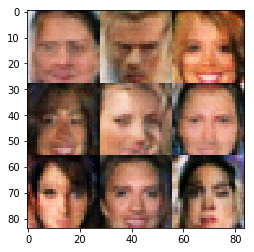

Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.6298
5700 of  12662.4375


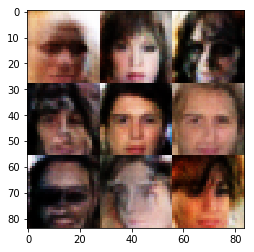

Epoch 1/1... Discriminator Loss: 2.0016... Generator Loss: 0.2665
5800 of  12662.4375


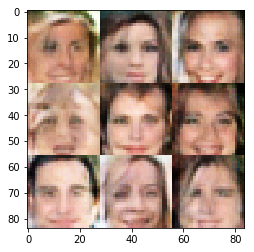

Epoch 1/1... Discriminator Loss: 2.3436... Generator Loss: 0.1634
5900 of  12662.4375


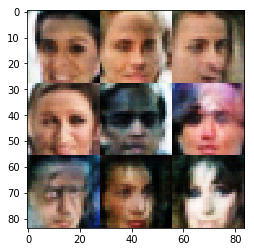

Epoch 1/1... Discriminator Loss: 1.8032... Generator Loss: 0.8457
6000 of  12662.4375


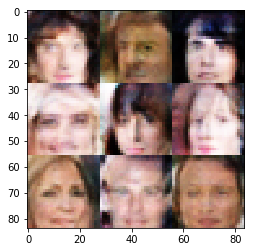

Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 0.4878
6100 of  12662.4375


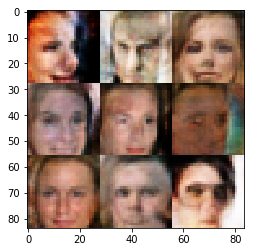

Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.6985
6200 of  12662.4375


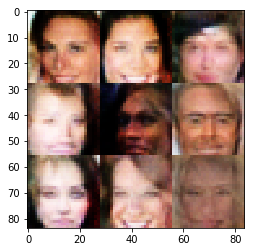

Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.5605
6300 of  12662.4375


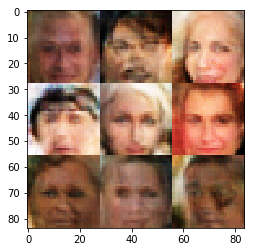

Epoch 1/1... Discriminator Loss: 2.3246... Generator Loss: 0.1770
6400 of  12662.4375


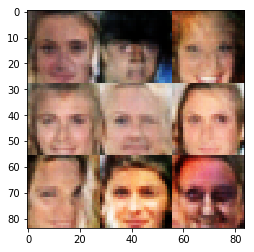

Epoch 1/1... Discriminator Loss: 1.8309... Generator Loss: 0.4482
6500 of  12662.4375


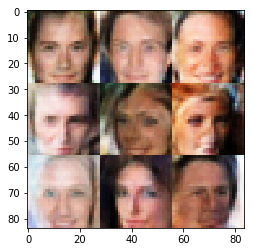

Epoch 1/1... Discriminator Loss: 1.5443... Generator Loss: 0.5552
6600 of  12662.4375


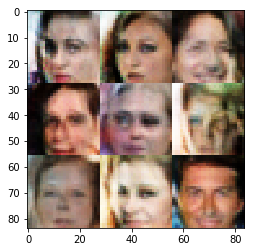

Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.4291
6700 of  12662.4375


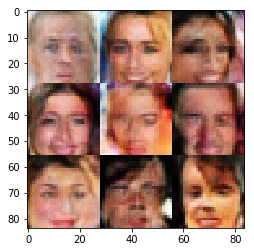

Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.6267
6800 of  12662.4375


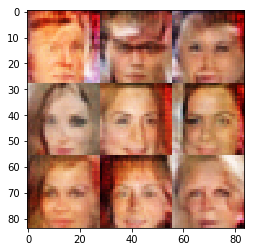

Epoch 1/1... Discriminator Loss: 2.3581... Generator Loss: 0.2141
6900 of  12662.4375


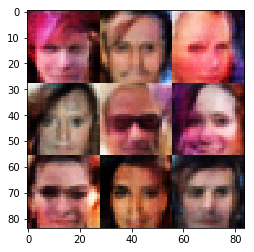

Epoch 1/1... Discriminator Loss: 2.4841... Generator Loss: 0.7910
7000 of  12662.4375


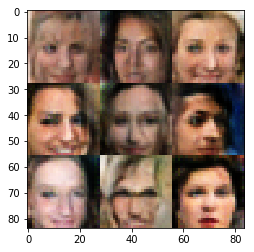

Epoch 1/1... Discriminator Loss: 0.6322... Generator Loss: 2.0967
7100 of  12662.4375


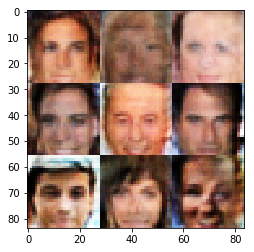

Epoch 1/1... Discriminator Loss: 0.8013... Generator Loss: 1.1177
7200 of  12662.4375


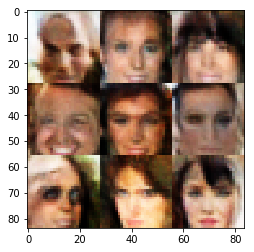

Epoch 1/1... Discriminator Loss: 1.9322... Generator Loss: 0.2988
7300 of  12662.4375


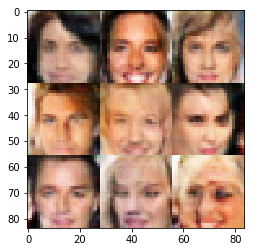

Epoch 1/1... Discriminator Loss: 0.7434... Generator Loss: 1.6783
7400 of  12662.4375


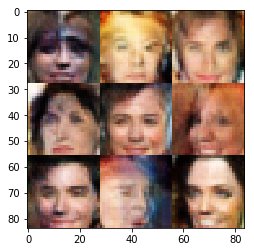

Epoch 1/1... Discriminator Loss: 0.7318... Generator Loss: 1.2921
7500 of  12662.4375


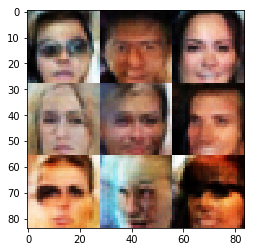

Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 0.7809
7600 of  12662.4375


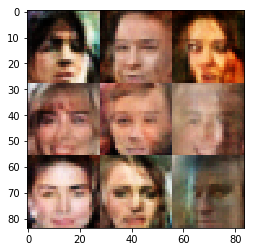

Epoch 1/1... Discriminator Loss: 1.4711... Generator Loss: 0.4716
7700 of  12662.4375


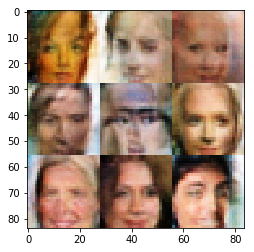

Epoch 1/1... Discriminator Loss: 1.6662... Generator Loss: 0.3631
7800 of  12662.4375


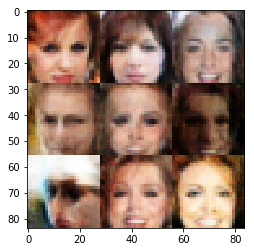

Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 0.7658
7900 of  12662.4375


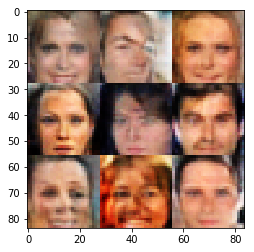

Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 1.1916
8000 of  12662.4375


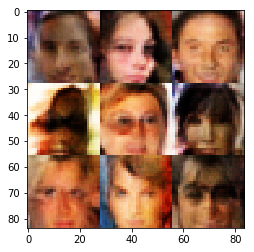

Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 2.9965
8100 of  12662.4375


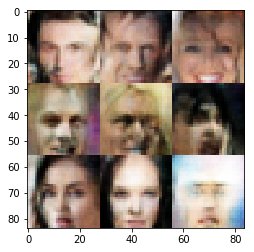

Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.8437
8200 of  12662.4375


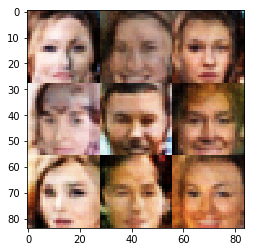

Epoch 1/1... Discriminator Loss: 0.9335... Generator Loss: 2.3697
8300 of  12662.4375


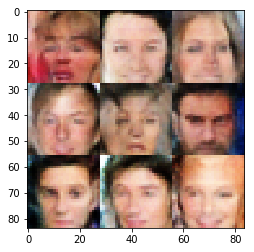

Epoch 1/1... Discriminator Loss: 2.7727... Generator Loss: 0.1047
8400 of  12662.4375


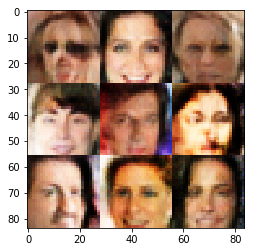

Epoch 1/1... Discriminator Loss: 0.3656... Generator Loss: 3.7219
8500 of  12662.4375


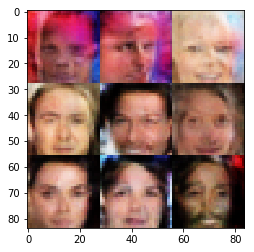

Epoch 1/1... Discriminator Loss: 1.4991... Generator Loss: 0.4572
8600 of  12662.4375


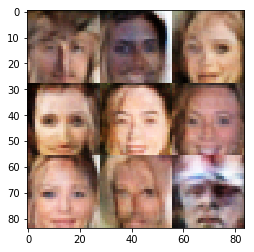

Epoch 1/1... Discriminator Loss: 0.5672... Generator Loss: 1.8339
8700 of  12662.4375


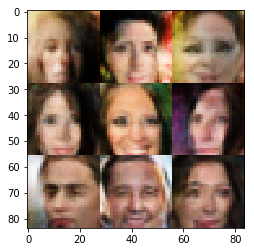

Epoch 1/1... Discriminator Loss: 0.6542... Generator Loss: 1.5468
8800 of  12662.4375


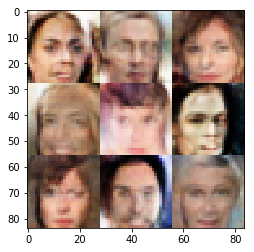

Epoch 1/1... Discriminator Loss: 0.6285... Generator Loss: 1.9003
8900 of  12662.4375


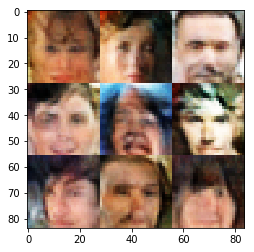

Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 1.3961
9000 of  12662.4375


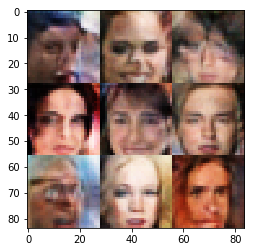

Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.8442
9100 of  12662.4375


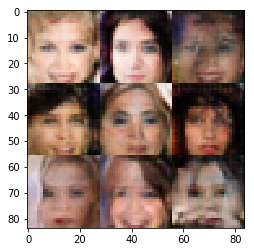

Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.5932
9200 of  12662.4375


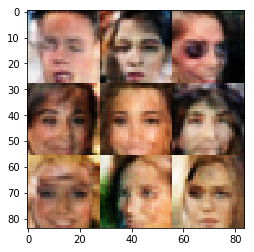

Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 1.1102
9300 of  12662.4375


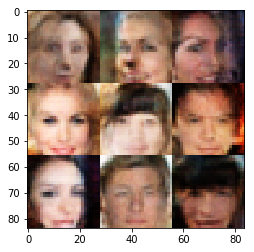

Epoch 1/1... Discriminator Loss: 0.8406... Generator Loss: 1.1825
9400 of  12662.4375


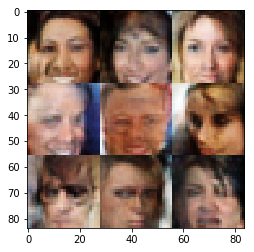

Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.6751
9500 of  12662.4375


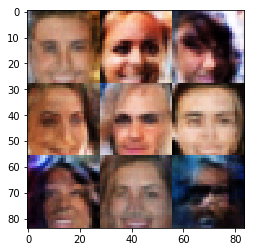

Epoch 1/1... Discriminator Loss: 1.6735... Generator Loss: 0.3913
9600 of  12662.4375


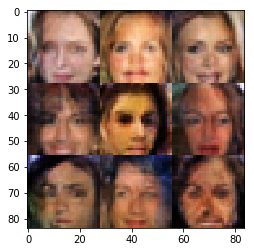

Epoch 1/1... Discriminator Loss: 0.8187... Generator Loss: 1.0728
9700 of  12662.4375


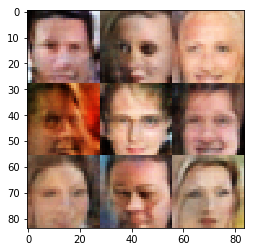

Epoch 1/1... Discriminator Loss: 0.6971... Generator Loss: 1.3628
9800 of  12662.4375


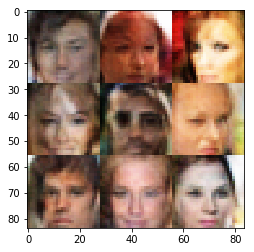

Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.5675
9900 of  12662.4375


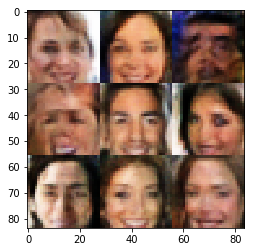

Epoch 1/1... Discriminator Loss: 0.5892... Generator Loss: 1.8226
10000 of  12662.4375


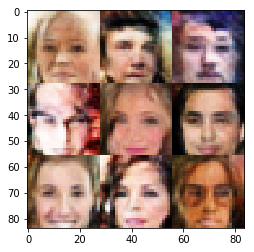

Epoch 1/1... Discriminator Loss: 0.3960... Generator Loss: 4.1778
10100 of  12662.4375


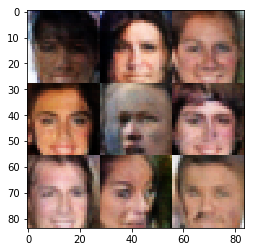

Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 0.8846
10200 of  12662.4375


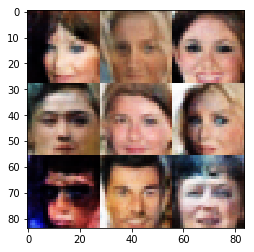

Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.8743
10300 of  12662.4375


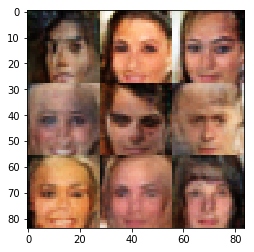

Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 1.7906
10400 of  12662.4375


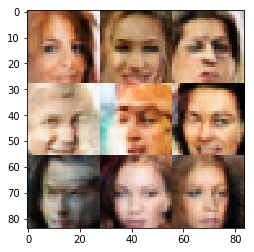

Epoch 1/1... Discriminator Loss: 0.8018... Generator Loss: 1.1992
10500 of  12662.4375


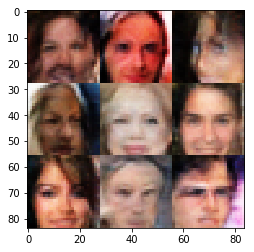

Epoch 1/1... Discriminator Loss: 0.4857... Generator Loss: 2.9055
10600 of  12662.4375


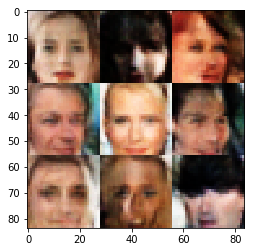

Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 0.9396
10700 of  12662.4375


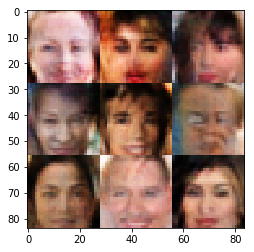

Epoch 1/1... Discriminator Loss: 1.8706... Generator Loss: 0.4651
10800 of  12662.4375


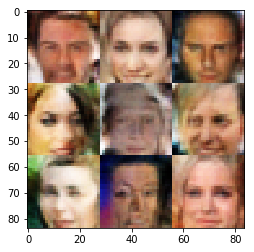

Epoch 1/1... Discriminator Loss: 2.8115... Generator Loss: 0.1165
10900 of  12662.4375


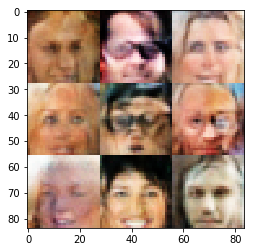

Epoch 1/1... Discriminator Loss: 0.6198... Generator Loss: 1.9196
11000 of  12662.4375


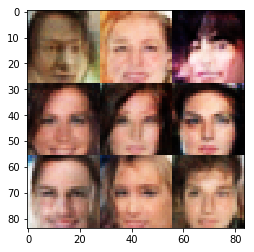

Epoch 1/1... Discriminator Loss: 0.5791... Generator Loss: 2.5684
11100 of  12662.4375


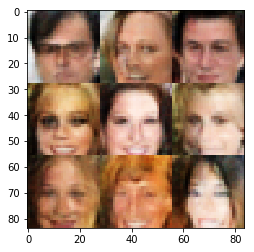

Epoch 1/1... Discriminator Loss: 1.8104... Generator Loss: 0.2836
11200 of  12662.4375


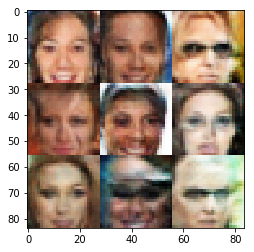

Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 4.2228
11300 of  12662.4375


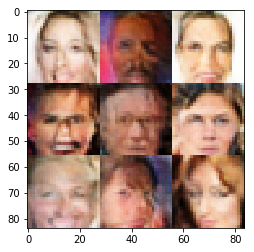

Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.5017
11400 of  12662.4375


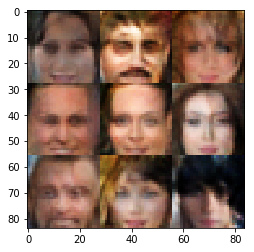

Epoch 1/1... Discriminator Loss: 2.0675... Generator Loss: 0.2371
11500 of  12662.4375


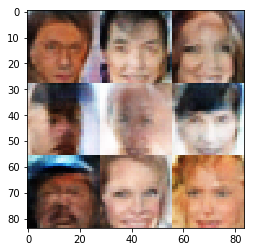

Epoch 1/1... Discriminator Loss: 0.5575... Generator Loss: 1.8772
11600 of  12662.4375


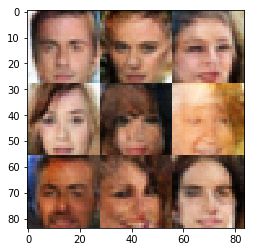

Epoch 1/1... Discriminator Loss: 0.7295... Generator Loss: 1.8659
11700 of  12662.4375


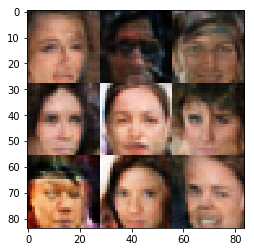

Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 0.5056
11800 of  12662.4375


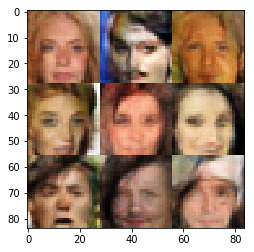

Epoch 1/1... Discriminator Loss: 1.4516... Generator Loss: 0.4817
11900 of  12662.4375


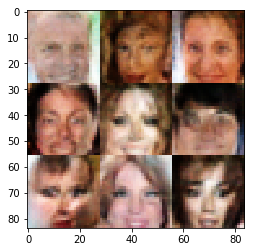

Epoch 1/1... Discriminator Loss: 0.6187... Generator Loss: 3.4651
12000 of  12662.4375


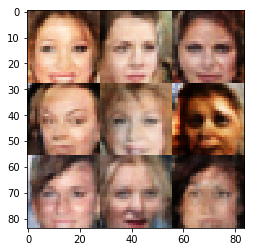

Epoch 1/1... Discriminator Loss: 0.7879... Generator Loss: 1.1177
12100 of  12662.4375


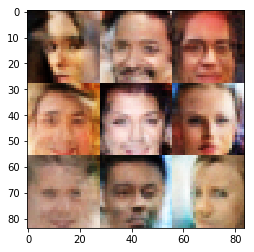

Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 0.7471
12200 of  12662.4375


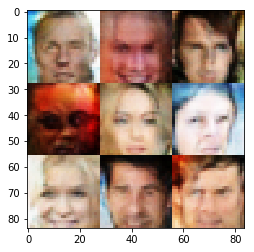

Epoch 1/1... Discriminator Loss: 1.6701... Generator Loss: 0.3958
12300 of  12662.4375


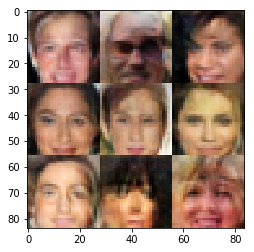

Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 2.2334
12400 of  12662.4375


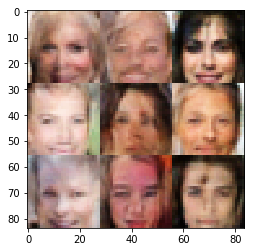

Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 1.0045
12500 of  12662.4375


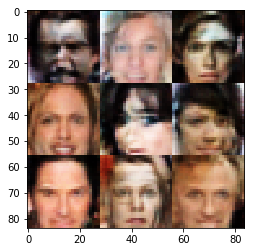

Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 0.8930
12600 of  12662.4375


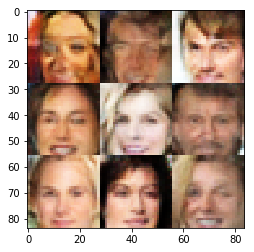

Epoch 1/1... Discriminator Loss: 0.5635... Generator Loss: 1.7712


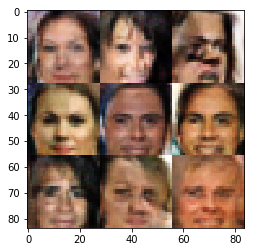

Final Discriminator Loss: 0.5328... Generator Loss: 2.1605


In [12]:
batch_size = 16
z_dim = 728
learning_rate = .0002 #.0004
beta1 = 0.1 #0.2
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)  

In [14]:
#In doing the this project, I followed along closely with the Intro to GANs and DCGANs examples.  

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.